<a href="https://colab.research.google.com/github/johnwesleyharding/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JWH_challenge_DS_Unit_1_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

pop = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

codes = codes[['geo','country']]

Check for missing/null values in the three dataframes

In [4]:
cell.describe()

,time,cell_phones_total
count,9215.000000,9.215000e+03
mean,1994.051329,8.403239e+06
std,14.255242,5.385699e+07
min,1960.000000,0.000000e+00
25%,1983.000000,0.000000e+00
50%,1995.000000,4.915000e+03
75%,2006.000000,1.260722e+06
max,2017.000000,1.474097e+09


In [5]:
cell.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [8]:
pop.describe()

,time,population_total
count,59297.000000,5.929700e+04
mean,1950.000000,2.311645e+07
std,86.891469,1.000223e+08
min,1800.000000,6.420000e+02
25%,1875.000000,4.424030e+05
50%,1950.000000,2.599582e+06
75%,2025.000000,1.088200e+07
max,2100.000000,1.678656e+09


In [9]:
pop.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [152]:
codes.describe()

,geo,country
count,273,273
unique,273,273
top,mda,Zimbabwe
freq,1,1


In [13]:
codes.isnull().sum()

geo        0
country    0
dtype: int64

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phone_total"

In [0]:
import matplotlib.pyplot as plt

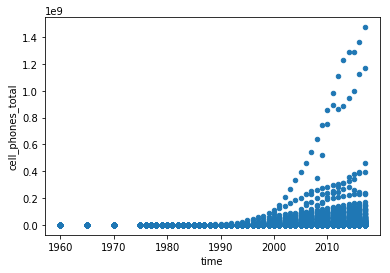

In [18]:
cell.plot.scatter('time', 'cell_phones_total')
plt.show()

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [19]:
print(cell.shape, pop.shape)

(9215, 3) (59297, 3)


In [22]:
cellpop = pd.merge(cell, pop, how = 'inner', on = ['geo', 'time'])
print(cellpop.shape)
cellpop.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [26]:
merged = pd.merge(cellpop, codes, how = 'inner', on = 'geo')
print(merged.shape)
merged.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [29]:
merged['mean'] = merged['cell_phones_total'] / merged['population_total']
merged.head()

,geo,time,cell_phones_total,population_total,country,mean
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [33]:
merged[(merged['country'] == 'United States') & (merged['time'] == 2017)]

,geo,time,cell_phones_total,population_total,country,mean
8134,usa,2017,395881000.0,324459463,United States,1.220125


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [118]:
print(merged.shape)
merged.describe()

(8590, 6)


,time,cell_phones_total,population_total,mean
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [36]:
merged.describe(include = object)

,geo,country
count,8590,8590
unique,195,195
top,grc,"Hong Kong, China"
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [51]:
mostphones = merged[merged['time'] == 2017]
mostphones.sort_values('cell_phones_total', ascending = False, inplace = True)
mostphones.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,geo,time,cell_phones_total,population_total,country,mean
1496,chn,2017,1.474097e+09,1409517397,China,1.045817
3595,ind,2017,1.168902e+09,1339180127,India,0.872849
3549,idn,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,usa,2017,3.958810e+08,324459463,United States,1.220125
1084,bra,2017,2.364885e+08,209288278,Brazil,1.129966


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:

- You can make a crosstab. 
- You're going to want occupations as the column indexes and years as the row indexes
- Use the `normalize` parameter to get percentages by year.

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [56]:
df.head(1)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"


In [59]:
pd.crosstab(df['Year'], df['Occupation'], normalize = True)

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.055700,0.000743,0.004085,0.001114
2000,0.046417,0.005199,0.007798,0.003342
2001,0.042332,0.002228,0.011511,0.002228
2002,0.036762,0.004085,0.015596,0.002599
2003,0.034534,0.006313,0.015225,0.005570
2004,0.023394,0.013739,0.016710,0.007055
2005,0.022280,0.009655,0.020052,0.008169
2006,0.021537,0.011511,0.017453,0.009283
2007,0.013368,0.008912,0.017453,0.012625


### Part 2 — Recreate this explanatory visualization:



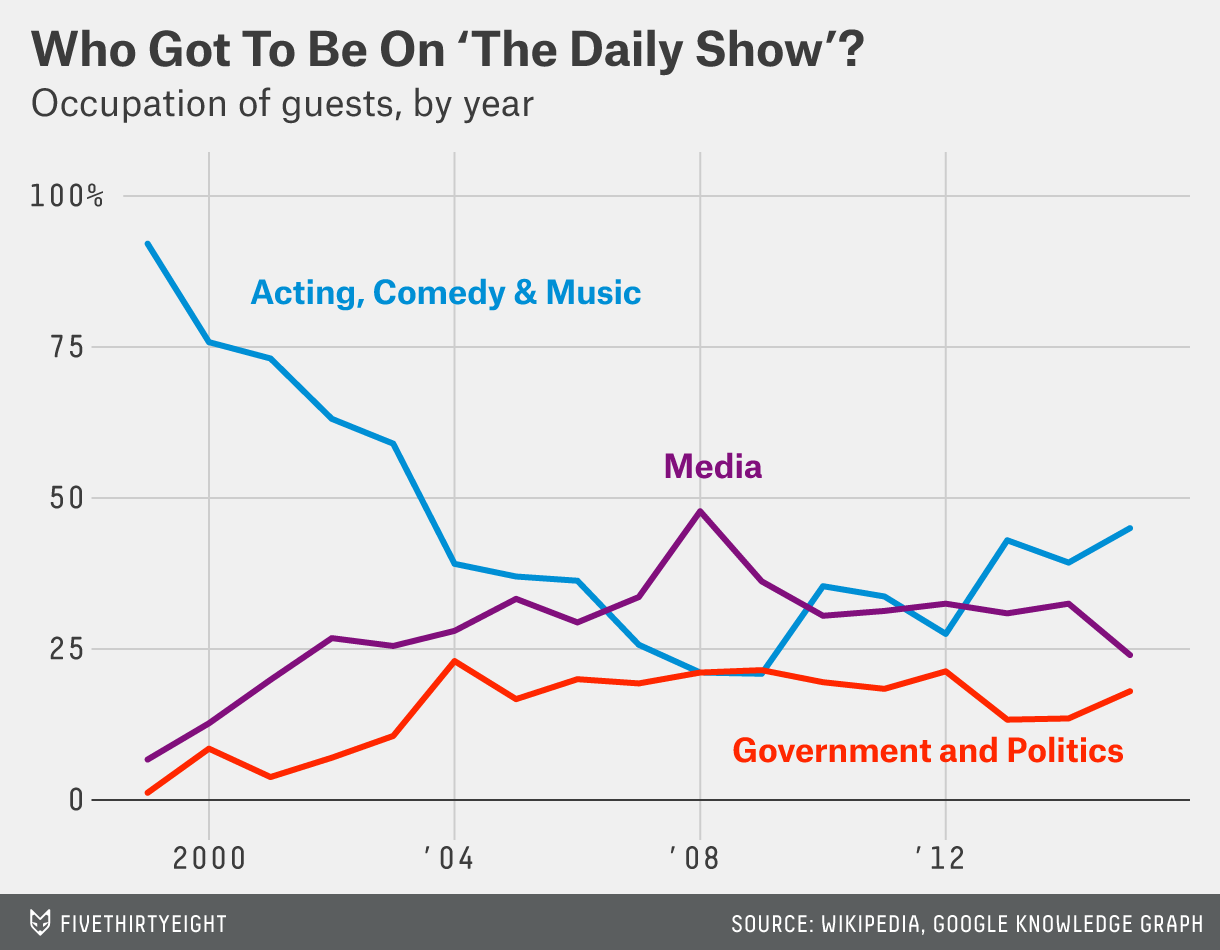

In [60]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

In [0]:
plt.style.use('fivethirtyeight')

In [63]:
mod = pd.crosstab(df['Year'], df['Occupation'], normalize = True)
mod.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.055700,0.000743,0.004085,0.001114
2000,0.046417,0.005199,0.007798,0.003342
2001,0.042332,0.002228,0.011511,0.002228
2002,0.036762,0.004085,0.015596,0.002599
2003,0.034534,0.006313,0.015225,0.005570


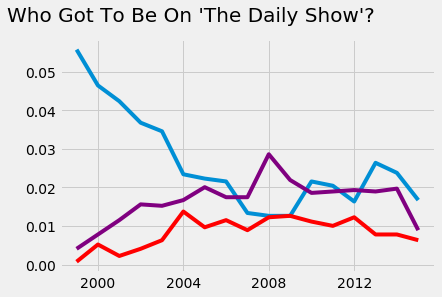

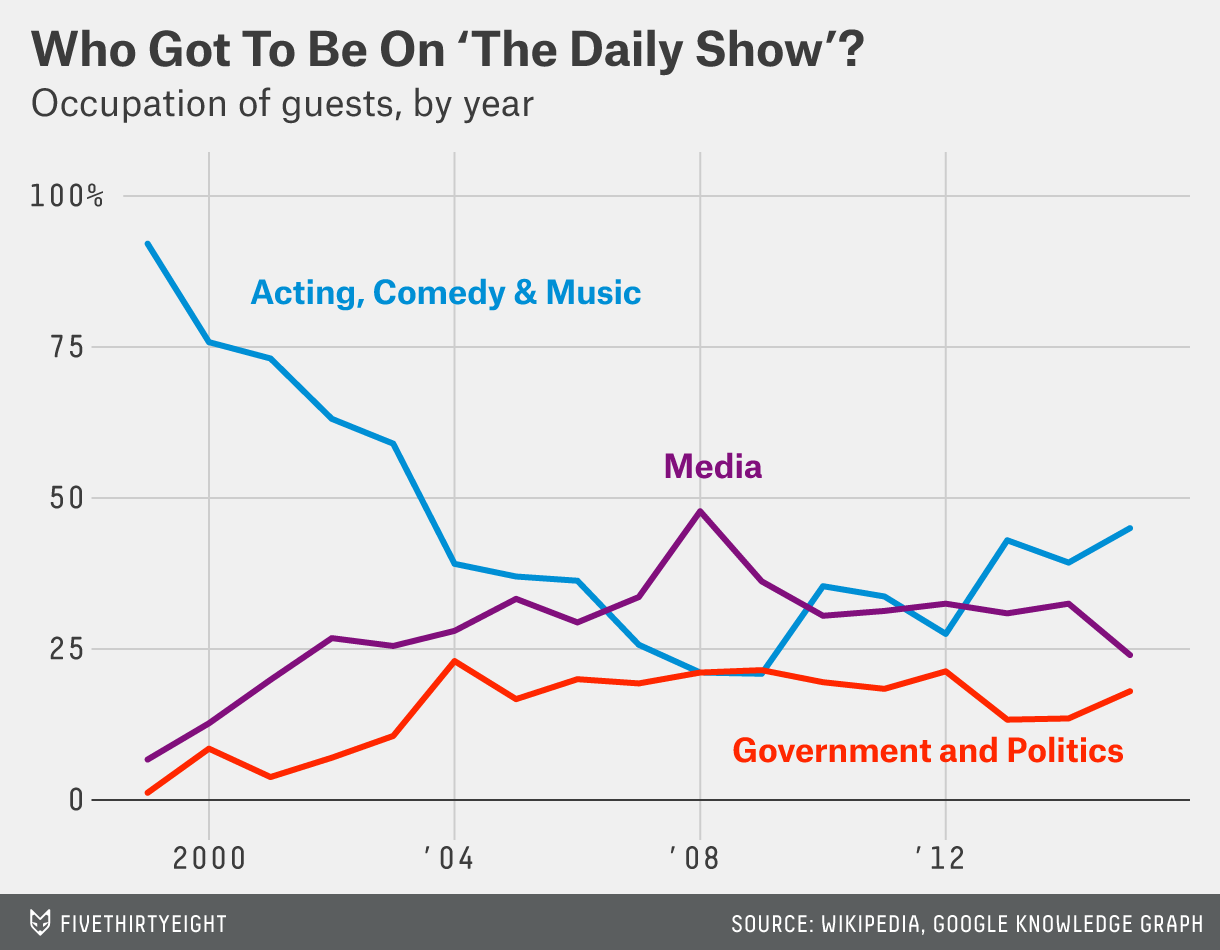

In [108]:
fig, ax = plt.subplots()

plt.plot(mod['Acting, Comedy & Music'], label = True)
plt.plot(mod['Government and Politics'], color = 'red')
plt.plot(mod['Media'], color = 'purple')

ax.set_title("Who Got To Be On 'The Daily Show'?", 
             fontsize = 20, x = .35, y = 1.05)
# ax.text(s = 'Occupation, of guests, by year', 
#             fontsize = 12, x = .35, y = 1.05)

ax.set_xticklabels(range(2000, 2016, 4), rotation=0)
ax.set_xticks(range(2000, 2016, 4))

#ax.set_yticklabels(range(0, 100, 25))
#ax.set_yticks(range(0, 1, 4))

plt.show()
display(example)

## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

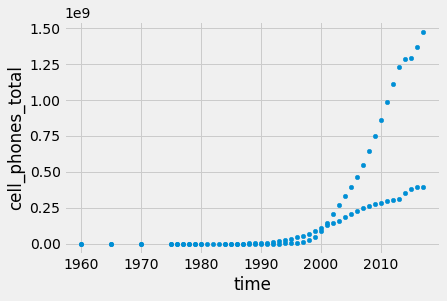

In [117]:
usachina = cell[(cell['geo'] == 'usa') | (cell['geo'] == 'chn')]
usachina.plot.scatter('time', 'cell_phones_total')
plt.show()

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

We want to focus on the data common to both charts, and not bring in all the data from both frames (in this case the population dataframe was much larger).  We aren't interested the data from before cell phones existed.

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

In [121]:
def upgeo(code):
  return code.upper()

usachina['geo'] = usachina['geo'].apply(upgeo)
usachina.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,geo,time,cell_phones_total
1565,CHN,1960,0.0
1566,CHN,1965,0.0
1567,CHN,1970,0.0
1568,CHN,1975,0.0
1569,CHN,1976,0.0


### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [145]:
usa = merged[merged['geo'] == 'usa']
usa[usa['cell_phones_total'] > usa['population_total']]

,geo,time,cell_phones_total,population_total,country,mean
8131,usa,2014,355500000.0,317718779,United States,1.118914
8132,usa,2015,382307000.0,319929162,United States,1.194974
8133,usa,2016,395881000.0,322179605,United States,1.228759
8134,usa,2017,395881000.0,324459463,United States,1.220125


In [148]:
usa[usa['time'] == 2013]

,geo,time,cell_phones_total,population_total,country,mean
8130,usa,2013,310698000.0,315536676,United States,0.984665


answer: 2014, and apparently zero net phone acquisition in 2017, the market is saturated

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, and adding a subtitle. 

If you have already completed everything else, take this as far as you can within the time limit.

In [149]:
fake.plot()

NameError: ignored

the quality of the graph cannot be disputed